# Project 6. Choosing a car profitably

In [ ]:
import numpy as np
import pandas as pd 
import sys
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder

# The main Data

In [937]:
test = pd.read_csv('test.csv')
train = pd.read_csv('all_cars_raw.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test.sample()

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,...,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
14112,пикап двойная кабина,NISSAN,https://auto.ru/cars/used/sale/nissan/navara/1...,чёрный,NaN,"По факту второй владелец, по двигателю и ходов...",2.5 LTR,174 N12,"{""engine-proof"":true,""cruise-control"":true,""as...",дизель,...,PICKUP_TWO AUTOMATIC 2.5,автоматическая,JAPANESE,2 владельца,13 лет,Оригинал,полный,Левый,Не требует ремонта,Растаможен


In [938]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   car_url               34686 non-null  object
 3   color                 34686 non-null  object
 4   complectation_dict    6418 non-null   object
 5   description           34686 non-null  object
 6   engineDisplacement    34686 non-null  object
 7   enginePower           34686 non-null  object
 8   equipment_dict        24690 non-null  object
 9   fuelType              34686 non-null  object
 10  image                 34686 non-null  object
 11  mileage               34686 non-null  int64 
 12  modelDate             34686 non-null  int64 
 13  model_info            34686 non-null  object
 14  model_name            34686 non-null  object
 15  name                  34686 non-null

In [939]:
test.head(5)

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,...,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
0,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,синий,NaN,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,"{""engine-proof"":true,""tinted-glass"":true,""airb...",бензин,...,LIFTBACK ROBOT 1.2,роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
1,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,чёрный,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,...,LIFTBACK MECHANICAL 1.6,механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
2,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/superb/11...,серый,"{""id"":""20026336"",""name"":""Ambition"",""available_...","Все автомобили, представленные в продаже, прох...",1.8 LTR,152 N12,"{""cruise-control"":true,""tinted-glass"":true,""es...",бензин,...,LIFTBACK ROBOT 1.8,роботизированная,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
3,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,коричневый,"{""id"":""20803582"",""name"":""Ambition"",""available_...",КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110 N12,"{""cruise-control"":true,""roller-blind-for-rear-...",бензин,...,LIFTBACK AUTOMATIC 1.6,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
4,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,белый,NaN,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,...,LIFTBACK AUTOMATIC 1.8,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен


In [940]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61260 entries, 0 to 61259
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           61260 non-null  int64  
 1   test                 61260 non-null  int64  
 2   style                61260 non-null  object 
 3   body                 61260 non-null  object 
 4   color                61260 non-null  object 
 5   fuel                 61260 non-null  object 
 6   model_date           59518 non-null  float64
 7   doors                61260 non-null  int64  
 8   production_date      61260 non-null  float64
 9   transmission         61260 non-null  object 
 10  engine_displacement  61200 non-null  float64
 11  engine_power         61260 non-null  int64  
 12  mileage              61260 non-null  int64  
 13  drive_type           61260 non-null  object 
 14  wheel                61260 non-null  object 
 15  condition            61260 non-null 

In [941]:
train.head()

,Unnamed: 0,test,style,body,color,fuel,model_date,doors,production_date,transmission,...,vehicle_title,description,features,ownership,price,url,custom,catalog_url,brand,generation
0,0,0,1.6 MT (105 л.с.),седан,белый,Бензин,2009.0,5,2013.0,механическая,...,Оригинал,Машина отличная. Честно была в такси. Точнее д...,[],NaN,360000,https://auto.ru/cars/used/sale/volkswagen/polo...,Растаможен,https://auto.ru/catalog/cars/volkswagen/polo/5...,volkswagen,5 поколение
1,1,0,3.6 AT (280 л.с.) 4WD,внедорожник,серый,Бензин,2007.0,5,2008.0,автоматическая,...,Оригинал,"Продаю из-за ипотеки, машина кредитная банк сн...","['Круиз-контроль', 'Мультифункциональное рулев...",1 год и 4 месяца,820000,https://auto.ru/cars/used/sale/volkswagen/toua...,Растаможен,https://auto.ru/catalog/cars/volkswagen/touare...,volkswagen,1 поколение рестайлинг
2,2,0,1.2 MT (86 л.с.),компактвэн,синий,Бензин,2010.0,5,2011.0,механическая,...,Оригинал,хорошая рабочая машина все работает то пройде...,"['Количество мест: 2', 'Ткань (Материал салона...",2 года и 11 месяцев,390000,https://auto.ru/cars/used/sale/volkswagen/cadd...,Растаможен,https://auto.ru/catalog/cars/volkswagen/caddy/...,volkswagen,3 поколение рестайлинг
3,3,0,2.5d MT (174 л.с.),минивэн,чёрный,Дизель,2003.0,5,2004.0,механическая,...,Оригинал,Много дополнительного оборудования и аксессуаров,[],NaN,1500000,https://auto.ru/cars/used/sale/volkswagen/mult...,Растаможен,https://auto.ru/catalog/cars/volkswagen/multiv...,volkswagen,NaN
4,4,0,1.6 AT (110 л.с.),седан,белый,Бензин,2014.0,5,2019.0,автоматическая,...,Оригинал,Машина в идеальном состоянии! Чехлы надеты сра...,"['Круиз-контроль', 'Электростеклоподъёмники пе...",8 месяцев,840000,https://auto.ru/cars/used/sale/volkswagen/polo...,Растаможен,https://auto.ru/catalog/cars/volkswagen/polo/2...,volkswagen,5 поколение рестайлинг


In [942]:
#redundant columns in test:
print(set(test.columns)-set(train.columns))
print(set(train.columns)-set(test.columns))

{'priceCurrency', 'image', 'Руль', 'vehicleConfiguration', 'Таможня', 'car_url', 'vendor', 'vehicleTransmission', 'numberOfDoors', 'sell_id', 'equipment_dict', 'parsing_unixtime', 'Привод', 'modelDate', 'Состояние', 'model_name', 'complectation_dict', 'ПТС', 'model_info', 'engineDisplacement', 'Владение', 'name', 'super_gen', 'productionDate', 'enginePower', 'fuelType', 'bodyType', 'Владельцы'}
{'generation', 'model_date', 'vehicle_title', 'condition', 'features', 'transmission', 'drive_type', 'custom', 'body', 'url', 'fuel', 'production_date', 'catalog_url', 'doors', 'engine_power', 'ownership', 'owners', 'engine_displacement', 'price', 'Unnamed: 0', 'style', 'wheel', 'test'}


In [943]:
# Drop data (columns) what can't be processed.
test=test.drop(['model_name', 'parsing_unixtime', 'priceCurrency', 'equipment_dict', 'model_info', 'sell_id', 'vendor', 'complectation_dict', 'image', 'car_url', 'super_gen', 'Владение'], axis=1)
#'model_name might been deleted, there are additional charachterestics.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              34686 non-null  object
 1   brand                 34686 non-null  object
 2   color                 34686 non-null  object
 3   description           34686 non-null  object
 4   engineDisplacement    34686 non-null  object
 5   enginePower           34686 non-null  object
 6   fuelType              34686 non-null  object
 7   mileage               34686 non-null  int64 
 8   modelDate             34686 non-null  int64 
 9   name                  34686 non-null  object
 10  numberOfDoors         34686 non-null  int64 
 11  productionDate        34686 non-null  int64 
 12  vehicleConfiguration  34686 non-null  object
 13  vehicleTransmission   34686 non-null  object
 14  Владельцы             34686 non-null  object
 15  ПТС                   34685 non-null

# The Fitting:) 

In [944]:
train.rename(columns={'body': 'bodyType',
                     'vehicle_title': 'ПТС',
                     'engine_displacement': 'engineDisplacement',
                     'engine_power': 'enginePower',
                     'fuel': 'fuelType',
                     'model_date': 'modelDate',
                     'doors': 'numberOfDoors',
                     'production_date': 'productionDate',
                     'transmission': 'vehicleTransmission',
                     'drive_type': 'Привод',
                     'owners': 'Владельцы',
                     'wheel': 'Руль',
                      'ownership': 'Владение',
                     'Цена': 'price',
                     'condition': 'Состояние', 'custom': 'Таможня', 'features': 'equipment_dict', 'brand': 'brand', 'color': 'color'   }, inplace=True)

In [945]:
#Let's clean empty lines in all columns except for the least filled - 'Владельцы'и 'Владение'.
train = train.dropna(subset=['bodyType', 'brand', 'color', 'fuelType', 'modelDate', 'numberOfDoors', 'productionDate', 'vehicleTransmission', 'engineDisplacement', 'enginePower',
       'description', 'mileage', 'Привод', 'Руль', 'ПТС', 'Таможня', 'price',])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53971 entries, 0 to 61259
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           53971 non-null  int64  
 1   test                 53971 non-null  int64  
 2   style                53971 non-null  object 
 3   bodyType             53971 non-null  object 
 4   color                53971 non-null  object 
 5   fuelType             53971 non-null  object 
 6   modelDate            53971 non-null  float64
 7   numberOfDoors        53971 non-null  int64  
 8   productionDate       53971 non-null  float64
 9   vehicleTransmission  53971 non-null  object 
 10  engineDisplacement   53971 non-null  float64
 11  enginePower          53971 non-null  int64  
 12  mileage              53971 non-null  int64  
 13  Привод               53971 non-null  object 
 14  Руль                 53971 non-null  object 
 15  Состояние            53971 non-null 

In [946]:
train.head(5)

,Unnamed: 0,test,style,bodyType,color,fuelType,modelDate,numberOfDoors,productionDate,vehicleTransmission,...,ПТС,description,equipment_dict,Владение,price,url,Таможня,catalog_url,brand,generation
0,0,0,1.6 MT (105 л.с.),седан,белый,Бензин,2009.0,5,2013.0,механическая,...,Оригинал,Машина отличная. Честно была в такси. Точнее д...,[],NaN,360000,https://auto.ru/cars/used/sale/volkswagen/polo...,Растаможен,https://auto.ru/catalog/cars/volkswagen/polo/5...,volkswagen,5 поколение
1,1,0,3.6 AT (280 л.с.) 4WD,внедорожник,серый,Бензин,2007.0,5,2008.0,автоматическая,...,Оригинал,"Продаю из-за ипотеки, машина кредитная банк сн...","['Круиз-контроль', 'Мультифункциональное рулев...",1 год и 4 месяца,820000,https://auto.ru/cars/used/sale/volkswagen/toua...,Растаможен,https://auto.ru/catalog/cars/volkswagen/touare...,volkswagen,1 поколение рестайлинг
2,2,0,1.2 MT (86 л.с.),компактвэн,синий,Бензин,2010.0,5,2011.0,механическая,...,Оригинал,хорошая рабочая машина все работает то пройде...,"['Количество мест: 2', 'Ткань (Материал салона...",2 года и 11 месяцев,390000,https://auto.ru/cars/used/sale/volkswagen/cadd...,Растаможен,https://auto.ru/catalog/cars/volkswagen/caddy/...,volkswagen,3 поколение рестайлинг
3,3,0,2.5d MT (174 л.с.),минивэн,чёрный,Дизель,2003.0,5,2004.0,механическая,...,Оригинал,Много дополнительного оборудования и аксессуаров,[],NaN,1500000,https://auto.ru/cars/used/sale/volkswagen/mult...,Растаможен,https://auto.ru/catalog/cars/volkswagen/multiv...,volkswagen,NaN
4,4,0,1.6 AT (110 л.с.),седан,белый,Бензин,2014.0,5,2019.0,автоматическая,...,Оригинал,Машина в идеальном состоянии! Чехлы надеты сра...,"['Круиз-контроль', 'Электростеклоподъёмники пе...",8 месяцев,840000,https://auto.ru/cars/used/sale/volkswagen/polo...,Растаможен,https://auto.ru/catalog/cars/volkswagen/polo/2...,volkswagen,5 поколение рестайлинг


In [947]:
train = train.drop(['Unnamed: 0', 'catalog_url', 'equipment_dict', 'generation', 'url' ], axis=1)


In [948]:
# checking columns in diff daatasets:
test_columns=set(test.columns)
train_columns=set(train.columns)
train_columns-test_columns

{'price', 'style', 'test', 'Владение'}

In [949]:
Let's consider numerical characteristics - 'modelDate', 'productionDate' and 'mileage'. If there are emissions, 
something will have to be done with them.
Or don't. Let's consider the target variable 'price' separately

SyntaxError: invalid syntax (<ipython-input-949-f56af382272d>, line 1)

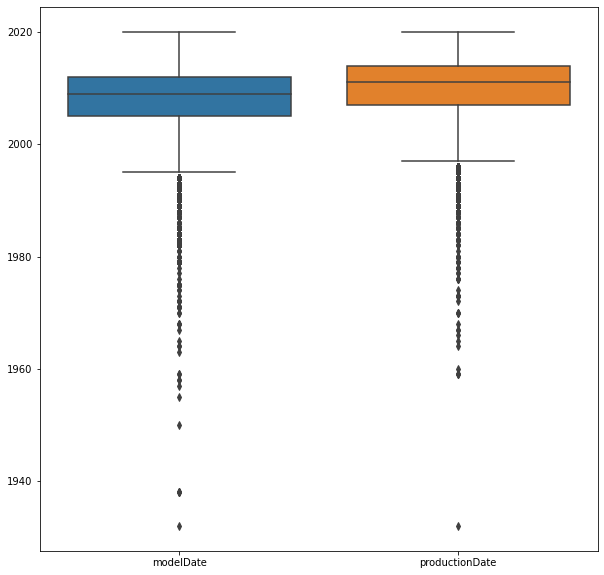

In [950]:
import seaborn as sns
boxes = train[['modelDate', 'productionDate']]
ax = sns.boxplot(data=boxes)

There are a lot off antique cars, so the main purpose not to purchase the old car, the main pur - to find good & effective model

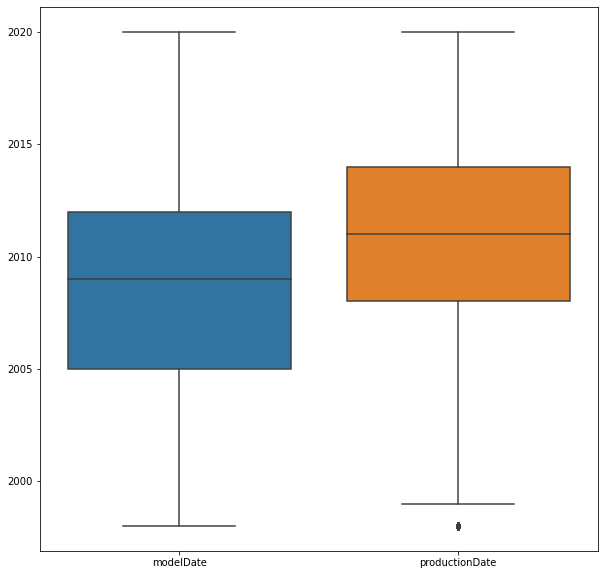

In [951]:
Q_005 = train.modelDate.quantile(0.05)
train = train.loc[train['modelDate']>=Q_005]

boxes = train[['modelDate', 'productionDate']]
ax = sns.boxplot(data=boxes)

<AxesSubplot:>

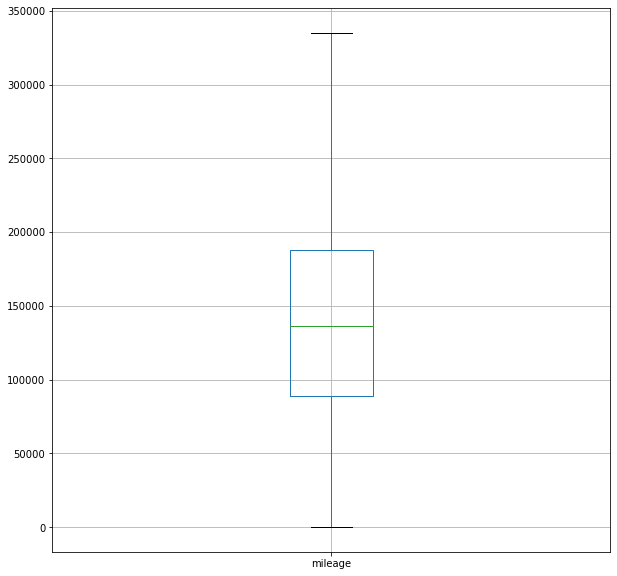

In [952]:
Q_098 = train['mileage'].quantile(0.98)
train = train.loc[train['mileage']<=Q_098]
train.boxplot(column=['mileage'])

<AxesSubplot:>

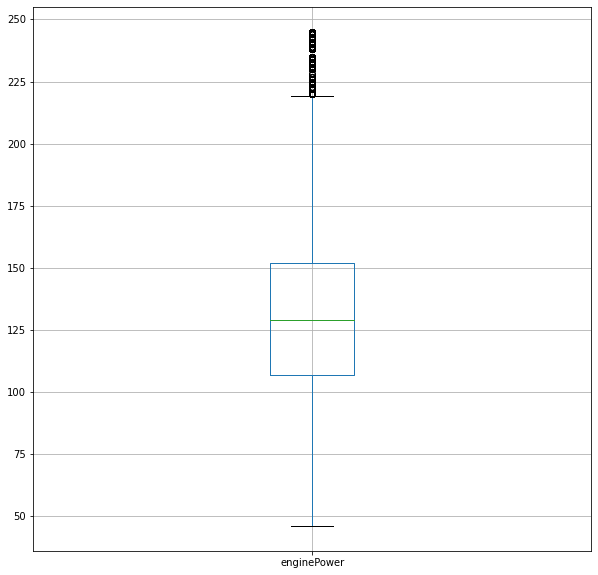

In [953]:
#The spread in this parameter is also large. Let's try to throw out 10% of the most powerful cars at once.
Q_090 = train['enginePower'].quantile(0.90)
train = train.loc[train['enginePower']<=Q_090]
train.boxplot(column=['enginePower'])

<AxesSubplot:>

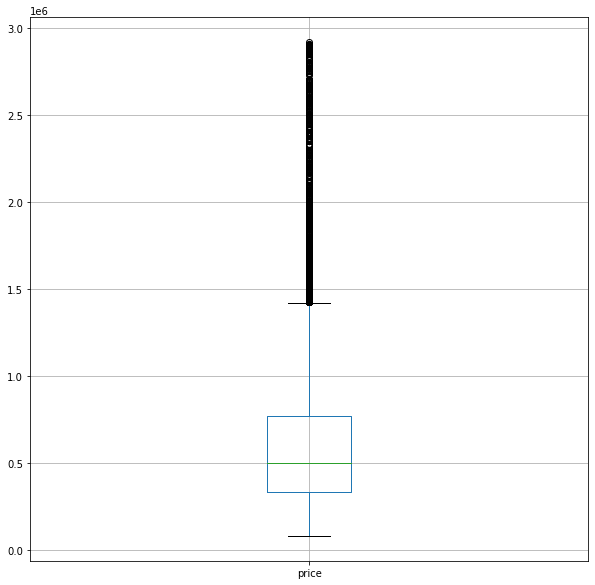

In [954]:
# Let's try to exclude 0.5% of the most expensive cars
Q_0995 = train['price'].quantile(0.995)
train = train.loc[train['price']<=Q_0995]
train.boxplot(column=['price'])

In [955]:
desc=[]
train['description'].apply(lambda x: desc.append(x))
print(str(desc).count('осле ДТП'))
print(str(desc).count('риложить руки'))
print(str(desc).count('ребует ремонта'))
print(str(desc).count('од ремонт'))
print(str(desc).count('не гнилое'))
print(str(desc).count('хорошем состояни'))
print(str(desc).count('отличном состояни'))
print(str(desc).count('приличном состояни'))
print(str(desc).count('нормальном состояни'))
print(str(desc).count('удовлетворительном состояни'))
print(str(desc).count('илер'))
print(str(desc).count('иллер'))
print(str(desc).count('восстановлен'))

28
69
130
9
19
6988
6692
34
207
21
10034
329
80


In [956]:
train["Владельцы"]= train["Владельцы"].replace('3 или более', '4')
train["Владельцы"]= train["Владельцы"].replace('3 или более', '4')
train["Владельцы"]= train["Владельцы"].replace('2 или более', '3')
train["Владельцы"]= train["Владельцы"].replace('1 или более', '2')
train["Владельцы"]= train["Владельцы"].replace('1 владелец', '1')
train["Владельцы"]= train["Владельцы"].replace('1 владелец', '1')
train["Владельцы"]= train["Владельцы"].replace('2 владельца', '2')
train["Владельцы"]= train["Владельцы"].replace('2 владельца', '2')
train["Владельцы"]= train["Владельцы"].replace('3 владельца', '3')

train["Владельцы"]

0        2
2        4
3        1
4        1
7        2
        ..
61254    4
61255    4
61257    4
61258    4
61259    4
Name: Владельцы, Length: 45339, dtype: object

In [957]:
desc=[]
test['description'].apply(lambda x: desc.append(x))
print(str(desc).count('осле ДТП'))
print(str(desc).count('риложить руки'))
print(str(desc).count('ребует ремонта'))
print(str(desc).count('од ремонт'))
print(str(desc).count('не гнилое'))
print(str(desc).count('хорошем состояни'))
print(str(desc).count('отличном состояни'))
print(str(desc).count('приличном состояни'))
print(str(desc).count('нормальном состояни'))
print(str(desc).count('удовлетворительном состояни'))
print(str(desc).count('илер'))
print(str(desc).count('иллер'))
print(str(desc).count('восстановлен'))

13
107
747
7
28
3667
4561
29
113
19
11483
199
169


In [958]:
#numeric value for train
def descriptor (text):
    if text.__contains__('отличном состояни' or 'хорошем состояни'):
        return 1
    elif text.__contains__('приличном состояни' or 'нормальном состояни' or 'удовлетворительном состояни'):
        return 0
    elif text.__contains__('риложить руки' or 'ребует ремонта' or 'гнил'):
        return -1
    elif text.__contains__('осле ДТП' or 'осле дтп' or 'восстановлен'):
        return -2
    else:
        return 0
train['description'] = train['description'].apply(descriptor)
#Для совсем новых авто ставим наивысшую оценку - 2.
train.loc[train.mileage==0]['description']=2
train['description'].sample(5)


30878    1
35652    1
9038     0
3695     0
34241    0
Name: description, dtype: int64

In [959]:
#numeric value for test
def descriptor (text):
    if text.__contains__('отличном состояни' or 'хорошем состояни'):
        return 1
    elif text.__contains__('приличном состояни' or 'нормальном состояни' or 'удовлетворительном состояни'):
        return 0
    elif text.__contains__('риложить руки' or 'ребует ремонта' or 'гнил'):
        return -1
    elif text.__contains__('осле ДТП' or 'осле дтп' or 'восстановлен'):
        return -2
    else:
        return 0
test['description'] = test['description'].apply(descriptor)
#Для совсем новых авто ставим наивысшую оценку - 2.
test.loc[test.mileage==0]['description']=2
test['description'].sample(5)

9090     0
22475    0
9070     0
13688    0
13064    0
Name: description, dtype: int64

In [960]:
#rename 'Состояние' on 1.
#test = test.drop(['description'], axis = 1)
test['Состояние']=1
train['Состояние']=1

In [961]:
# in column 'Владение' not enogh inf, so nee to drop it
train = train.drop(['Владение'], axis = 1)

In [962]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45339 entries, 0 to 61259
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test                 45339 non-null  int64  
 1   style                45339 non-null  object 
 2   bodyType             45339 non-null  object 
 3   color                45339 non-null  object 
 4   fuelType             45339 non-null  object 
 5   modelDate            45339 non-null  float64
 6   numberOfDoors        45339 non-null  int64  
 7   productionDate       45339 non-null  float64
 8   vehicleTransmission  45339 non-null  object 
 9   engineDisplacement   45339 non-null  float64
 10  enginePower          45339 non-null  int64  
 11  mileage              45339 non-null  int64  
 12  Привод               45339 non-null  object 
 13  Руль                 45339 non-null  object 
 14  Состояние            45339 non-null  int64  
 15  Владельцы            45339 non-null 

In [963]:
#the empty values will fill by 0.
train['Владельцы']=train['Владельцы'].fillna(0)
train.sample(3)

,test,style,bodyType,color,fuelType,modelDate,numberOfDoors,productionDate,vehicleTransmission,engineDisplacement,...,mileage,Привод,Руль,Состояние,Владельцы,ПТС,description,price,Таможня,brand
49039,0,1.5 MT (98 л.с.),седан,серебристый,Бензин,2002.0,5,2006.0,механическая,1.5,...,161067,передний,Левый,1,2,Оригинал,0,299000,Растаможен,nissan
12513,0,1.6 MT (87 л.с.),седан,серый,Бензин,2004.0,5,2009.0,механическая,1.6,...,253000,передний,Левый,1,4,Оригинал,0,225000,Растаможен,renault
47544,0,2.5 CVT (182 л.с.),седан,чёрный,Бензин,2008.0,5,2010.0,вариатор,2.5,...,199000,передний,Левый,1,4,Оригинал,0,605000,Растаможен,nissan


In [964]:
test['Владельцы'].value_counts() 
test['Владельцы']=test['Владельцы'].apply(lambda x: int(x[0]))
test['Владельцы'].sample(5)

22224    3
9980     1
34056    1
5640     2
15764    2
Name: Владельцы, dtype: int64

In [965]:
#a lot of words, will do shrortest till the first word
train['bodyType']=train['bodyType'].apply(lambda x: x.split(' ')[0])

In [966]:
#same action with test
test['bodyType']=test['bodyType'].apply(lambda x: x.split(' ')[0])

In [967]:
# Let's replace the engine power with numerical values
test.enginePower=test.enginePower.apply(lambda x: int(x[:-4]))
test.enginePower.sample(5)

31933    272
12520    141
17030    156
2168     140
7057     210
Name: enginePower, dtype: int64

In [968]:
#First, let's bring the result in the test column to the same form as train
test.engineDisplacement=test.engineDisplacement.apply(lambda x: x[:-4])
# change the empty line on the most popular
test.engineDisplacement.loc[test.engineDisplacement=='   '] = '2.0'

C:\Users\1\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [969]:
transmission_dict={'автоматическая':'AUTOMATIC', 'механическая':'MECHANICAL', 'роботизированная':'ROBOT','вариатор':'VARIATOR'}
test.vehicleTransmission = test.vehicleTransmission.apply(lambda x: transmission_dict[x])
test.vehicleTransmission.sample(3)

32700    AUTOMATIC
33823    AUTOMATIC
6980     AUTOMATIC
Name: vehicleTransmission, dtype: object

In [970]:
#in variables that take one of two values, you must substitute "1" and "0"
train.Руль=train.Руль.apply(lambda x: 1 if x=='LEFT' else 0)
test.Руль=test.Руль.apply(lambda x: 1 if x=='Левый' else 0)

In [971]:
train.ПТС=train.ПТС.apply(lambda x: 1 if x=='ORIGINAL' else 0)
test.ПТС=test.ПТС.apply(lambda x: 1 if x=='Оригинал' else 0)

In [972]:
#All cars are cleared. This column can be deleted in both datasets.
train = train.drop(['Таможня'], axis = 1)
test = test.drop(['Таможня'], axis = 1)

In [973]:
#Check which columns do not match
print(set(test.columns)-set(train.columns))
print(set(train.columns)-set(test.columns))

{'name', 'vehicleConfiguration'}
{'test', 'price', 'style'}


In [974]:
test = test.reindex(columns=['bodyType', 'brand', 'color', 'fuelType', 'modelDate', 'numberOfDoors',
       'productionDate', 'vehicleTransmission', 'engineDisplacement',
       'enginePower', 'Состояние', 'mileage', 'Привод', 'Руль', 'Владельцы',
       'ПТС'])
print(test.columns)

Index(['bodyType', 'brand', 'color', 'fuelType', 'modelDate', 'numberOfDoors',
       'productionDate', 'vehicleTransmission', 'engineDisplacement',
       'enginePower', 'Состояние', 'mileage', 'Привод', 'Руль', 'Владельцы',
       'ПТС'],
      dtype='object')


# Preprocessing

In [975]:
# the baseline
columns = ['bodyType', 'brand', 'color', 'fuelType', 'modelDate', 'numberOfDoors',
       'productionDate', 'vehicleTransmission', 'engineDisplacement',
       'enginePower', 'Состояние', 'mileage', 'Привод', 'Руль', 'Владельцы',
       'ПТС']
df_train = train[columns]
df_test = test[columns]

In [976]:
y = train['price']

In [977]:
# combining two datasets
df_train['sample'] = 1 
df_test['sample'] = 0
data = df_test.append(df_train, sort=False).reset_index(drop=True) # combining
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80025 entries, 0 to 80024
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bodyType             80025 non-null  object 
 1   brand                80025 non-null  object 
 2   color                80025 non-null  object 
 3   fuelType             80025 non-null  object 
 4   modelDate            80025 non-null  float64
 5   numberOfDoors        80025 non-null  int64  
 6   productionDate       80025 non-null  float64
 7   vehicleTransmission  80025 non-null  object 
 8   engineDisplacement   80025 non-null  object 
 9   enginePower          80025 non-null  int64  
 10  Состояние            80025 non-null  int64  
 11  mileage              80025 non-null  int64  
 12  Привод               80025 non-null  object 
 13  Руль                 80025 non-null  int64  
 14  Владельцы            80025 non-null  object 
 15  ПТС                  80025 non-null 

<ipython-input-977-2c9696833df5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['sample'] = 1


In [978]:
#Adding dummie variables to the combined data
dummie_columns=['bodyType', 'brand', 'color', 'fuelType', 'vehicleTransmission', 'engineDisplacement', 'Привод']
for item in dummie_columns: 
    dummie_df=pd.get_dummies(data[item].apply(pd.Series).stack()).sum(level=0) # Создаём сет dummie-переменных
    data=pd.concat([data,dummie_df], axis=1)
data=data.drop(dummie_columns, axis = 1)
data.columns

Index([     'modelDate',  'numberOfDoors', 'productionDate',    'enginePower',
            'Состояние',        'mileage',           'Руль',      'Владельцы',
                  'ПТС',         'sample',
       ...
                  '5.7',            '5.8',            '5.9',            '6.0',
                  '6.2',            '6.3',            '6.6',         'задний',
             'передний',         'полный'],
      dtype='object', length=186)

In [980]:
# From date_production & date_model will do conclusion.
data.productionDate = (2021-data.productionDate)
data.modelDate = (2021-data.modelDate)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
colunns_to_scale=['modelDate', 'numberOfDoors', 'productionDate', 'enginePower','mileage']
scaler.fit(data[colunns_to_scale])
data[colunns_to_scale]=scaler.transform(data[colunns_to_scale])

data.sample(10)

,modelDate,numberOfDoors,productionDate,enginePower,Состояние,mileage,Руль,Владельцы,ПТС,sample,...,5.7,5.8,5.9,6.0,6.2,6.3,6.6,задний,передний,полный
56215,0.887931,0.727273,0.922414,0.188834,1,0.169999,0,4,0,1,...,0,0,0,0,0,0,0,1,0,0
2787,0.931034,0.454545,0.948276,0.320197,1,0.036556,1,2,1,0,...,0,0,0,0,0,0,0,0,0,1
30059,0.741379,0.363636,0.750000,0.169130,1,0.349999,1,3,0,0,...,0,0,0,0,0,0,0,0,1,0
54119,0.974138,0.454545,0.974138,0.152709,1,0.067999,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
29234,0.939655,0.363636,0.965517,0.262726,1,0.182395,1,3,1,0,...,0,0,0,0,0,0,0,1,0,0
30098,0.896552,0.454545,0.922414,0.155993,1,0.164999,1,3,1,0,...,0,0,0,0,0,0,0,0,1,0
62209,0.974138,0.454545,0.991379,0.152709,1,0.014999,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
29495,0.706897,0.363636,0.767241,0.308703,1,0.089999,1,3,1,0,...,0,0,0,0,0,0,0,1,0,0
33702,0.922414,0.454545,0.939655,0.174056,1,0.099989,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
54819,0.818966,0.454545,0.913793,0.118227,1,0.090367,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [986]:
#Separate Datasets
RANDOM_SEED=42
VAL_SIZE=0.2
X = data.query('sample == 1').drop(['sample'], axis=1)
X_sub = data.query('sample == 0').drop(['sample'], axis=1)

# Split

In [987]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

# Simple model 

In [988]:
# Creating a Function for MAPE
import numpy as np

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [989]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
predict = reg.predict(X_test)
 

#The Accuracy
print(f"Accuracy of simple model according MAPE: {(mape(y_test, predict))*100:0.2f}%")

Accuracy of simple model according MAPE: 14.66%


Good accuracy, let's get see which parameters influence?

<AxesSubplot:>

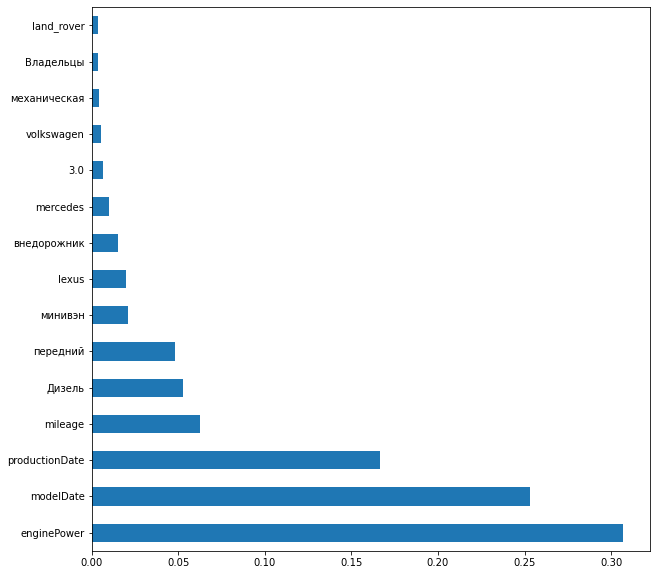

In [990]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [991]:
#the logarithm of the target, the exposure of the predict.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)
y_train = np.log(y_train)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
predict = np.exp(reg.predict(X_test))
print(f"Accuracy of model according MAPE: {(mape(y_test, predict))*100:0.2f}%")

Accuracy of model according MAPE: 13.51%


<AxesSubplot:>

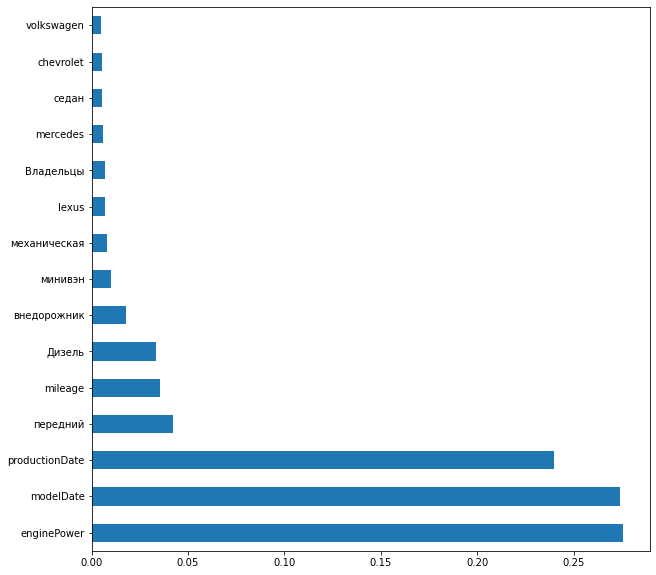

In [992]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

Characteristics that have the most impact: enginePower, modelDate, productionDAte

In [993]:
#there are names of columns by float type - let's change them to str  

In [994]:
X_sub[''] = X_sub[''].astype(str)

In [995]:
#& rename them in both datasets 'X' & 'X_sub'
X.rename({'':'aasssddddd', '0.7':'col', '1.0': 'b', '1.1': 'c', '1.2':'d', '1.3':'e', '1.4': 'f', '1.5': 'g', '1.6': 'h', '1.7': 'i', '1.8': 'k', '1.9': 'l', '2.0': 'm', '2.1': 'n', '2.2': 'o', '2.3': 'aa', '2.4': 'bb', '2.5': 'cc', '2.6': 'dd', '2.7': 'ee', '2.8': 'de', '2.9': 'fe', '3.0': 'se', '3.1': ' sde', '3.2': 'sda', '3.3': 'xsa', '3.4':'dfg', '3.5': 'gfc', '3.6': 're', '3.7': 'tr', '3.8': 'ty', '3.9': 'uy', '4.0': 'iu', '4.1': 'wee', '4.2': 'qw', '4.3': 'lk', '4.4': 'vbb', '4.5': 'mn', '4.6': 'xcd', '4.7': 'vcs', '4.8': 'hgg', '4.9': 'wert', '5.0': 'poi', '5.2': 'trew', '5.3': 'lkoe', '5.4': 'zvb', '5.5': 'sazza', '5.6': 'lwer', '5.7': 'bnmc', '5.8': 'gvcs', '5.9': 'powq', '6.0': 'nchd', '6.2': 'aloi', '6.3': 'cmak', '6.6': 'kfjf'  }, axis=1, inplace=True)

In [996]:
print(X_train.columns.tolist())

['modelDate', 'numberOfDoors', 'productionDate', 'enginePower', 'Состояние', 'mileage', 'Руль', 'Владельцы', 'ПТС', 'внедорожник', 'кабриолет', 'компактвэн', 'купе', 'купе-хардтоп', 'лимузин', 'лифтбек', 'микровэн', 'минивэн', 'пикап', 'родстер', 'седан', 'седан-хардтоп', 'тарга', 'универсал', 'фастбек', 'фургон', 'хэтчбек', 'AUDI', 'BMW', 'HONDA', 'INFINITI', 'LEXUS', 'MERCEDES', 'MITSUBISHI', 'NISSAN', 'SKODA', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'chevrolet', 'chrysler', 'citroen', 'ford', 'honda', 'hyundai', 'kia', 'land_rover', 'lexus', 'mazda', 'mercedes', 'mitsubishi', 'nissan', 'peugeot', 'renault', 'skoda', 'subaru', 'volkswagen', 'бежевый', 'белый', 'голубой', 'жёлтый', 'зелёный', 'золотистый', 'коричневый', 'красный', 'оранжевый', 'пурпурный', 'розовый', 'серебристый', 'серый', 'синий', 'фиолетовый', 'чёрный', 'Бензин', 'Бензин, газобаллонное оборудование', 'Газ', 'Газ, газобаллонное оборудование', 'Гибрид', 'Дизель', 'Дизель, газобаллонное оборудование', 'бензин', 'газ', 'гибри

In [997]:
X_sub.rename({'':'aasssddddd', '0.7':'col', '1.0': 'b', '1.1': 'c', '1.2':'d', '1.3':'e', '1.4': 'f', '1.5': 'g', '1.6': 'h', '1.7': 'i', '1.8': 'k', '1.9': 'l', '2.0': 'm', '2.1': 'n', '2.2': 'o', '2.3': 'aa', '2.4': 'bb', '2.5': 'cc', '2.6': 'dd', '2.7': 'ee', '2.8': 'de', '2.9': 'fe', '3.0': 'se', '3.1': ' sde', '3.2': 'sda', '3.3': 'xsa', '3.4':'dfg', '3.5': 'gfc', '3.6': 're', '3.7': 'tr', '3.8': 'ty', '3.9': 'uy', '4.0': 'iu', '4.1': 'wee', '4.2': 'qw', '4.3': 'lk', '4.4': 'vbb', '4.5': 'mn', '4.6': 'xcd', '4.7': 'vcs', '4.8': 'hgg', '4.9': 'wert', '5.0': 'poi', '5.2': 'trew', '5.3': 'lkoe', '5.4': 'zvb', '5.5': 'sazza', '5.6': 'lwer', '5.7': 'bnmc', '5.8': 'gvcs', '5.9': 'powq', '6.0': 'nchd', '6.2': 'aloi', '6.3': 'cmak', '6.6': 'kfjf'  }, axis=1, inplace=True)

In [998]:
print(X_sub.columns.tolist())

['modelDate', 'numberOfDoors', 'productionDate', 'enginePower', 'Состояние', 'mileage', 'Руль', 'Владельцы', 'ПТС', 'внедорожник', 'кабриолет', 'компактвэн', 'купе', 'купе-хардтоп', 'лимузин', 'лифтбек', 'микровэн', 'минивэн', 'пикап', 'родстер', 'седан', 'седан-хардтоп', 'тарга', 'универсал', 'фастбек', 'фургон', 'хэтчбек', 'AUDI', 'BMW', 'HONDA', 'INFINITI', 'LEXUS', 'MERCEDES', 'MITSUBISHI', 'NISSAN', 'SKODA', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'chevrolet', 'chrysler', 'citroen', 'ford', 'honda', 'hyundai', 'kia', 'land_rover', 'lexus', 'mazda', 'mercedes', 'mitsubishi', 'nissan', 'peugeot', 'renault', 'skoda', 'subaru', 'volkswagen', 'бежевый', 'белый', 'голубой', 'жёлтый', 'зелёный', 'золотистый', 'коричневый', 'красный', 'оранжевый', 'пурпурный', 'розовый', 'серебристый', 'серый', 'синий', 'фиолетовый', 'чёрный', 'Бензин', 'Бензин, газобаллонное оборудование', 'Газ', 'Газ, газобаллонное оборудование', 'Гибрид', 'Дизель', 'Дизель, газобаллонное оборудование', 'бензин', 'газ', 'гибри

# CatBoost, The model No 2

In [1001]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)
model = CatBoostRegressor(iterations = 10000,
                          random_seed = RANDOM_SEED,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, y_train,
         #cat_features=cat_features_ids,
         eval_set=(X_test, y_test),
         verbose_eval=0,
         use_best_model=True,
         #plot=True
         )

model.save_model('catboost_single_model_baseline.model')

In [1005]:
#cat_features=list(range(len(X.columns)))

In [1007]:
predict_test = (model.predict(X_test))
predict_submission = (model.predict(X_sub))

In [1009]:
# accuracy
predict = (model.predict(X_test))
print(f"Accuracy of model according MAPE: {(mape(y_test, predict))*100:0.2f}%")

Accuracy of model according MAPE: 10.68%


# Sub

In [1010]:
VERSION    = 16
sample_submission['price'] = predict_submission
sample_submission.to_csv(f'submission_2_v{VERSION}.csv', index=False)
sample_submission.head(10)

,sell_id,price
0,1100575026,6.145712e+05
1,1100549428,8.405400e+05
2,1100658222,8.761184e+05
3,1100937408,6.883969e+05
4,1101037972,7.306258e+05
5,1100912634,6.954399e+05
6,1101228730,7.922671e+05
7,1100165896,4.243497e+05
8,1100768262,1.758084e+06
9,1101218501,9.469163e+05


# KULULU